# Asmaa Mohamed Ismail

## The sparks Foundation internship 

### Task2: Predict the optimum number of Clusters Using Unsupervised ML(K-means) and represent it Visually

In [30]:
# importing libraries:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import datasets
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset:
iris= datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Data Exploration:

In [3]:
df.shape

(150, 4)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Note:
**There isn't missing Data in Iris Dataset**

## Visualizing The Data

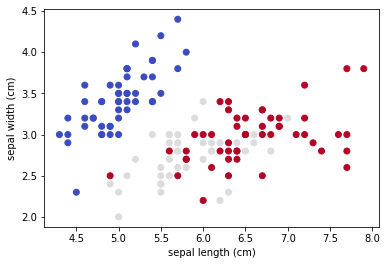

In [25]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=iris.target,cmap='coolwarm')
plt.xlabel('sepal length (cm)',fontsize=10)
plt.ylabel('sepal width (cm)',fontsize=10)
plt.show()

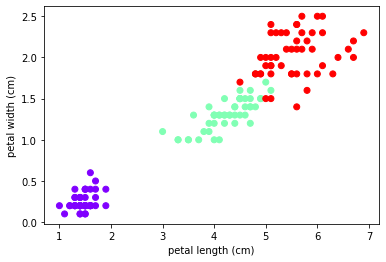

In [19]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=iris.target,cmap='rainbow')
plt.xlabel('petal length (cm)',fontsize=10)
plt.ylabel('petal width (cm)',fontsize=10)
plt.show()

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **There are(3)groups,but I will use elbow to show it graphically**

### The optimum Number Of Clusters for K-Means classification using Elbow Method 

In [31]:
wcss=[]
no_clusters = range(1,5)
for i in no_clusters:
    kmeans=KMeans(n_clusters =i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df.values)
    wcss.append(kmeans.inertia_)

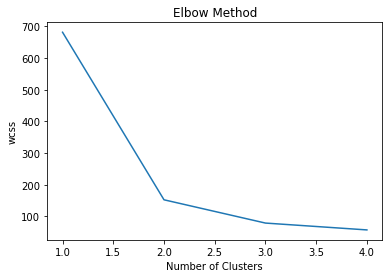

In [36]:
plt.plot(no_clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

### **From the above visualization , we can see the optimal number of clusters should be(3)**

### Applying Kmeans to the dataset:

In [37]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y=kmeans.fit_predict(df.values)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualizing the clusters:

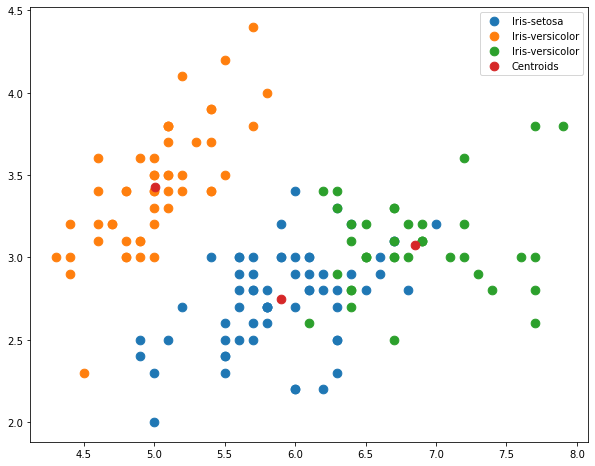

In [41]:
# Visualizing the clusters on the first two columns(spetal length,spetal width):
plt.figure(figsize=(10,8))
#0,0 means first cluster and first column,0,1 means fiest cluster and second column:
plt.scatter(df.values[y==0,0],df.values[y==0,1],s=75,label='Iris-setosa')
#1,0 means second cluster and first column, 1,1 means second cluster and second column:
plt.scatter(df.values[y==1,0],df.values[y==1,1],s=75,label='Iris-versicolor')
#2,0 means third cluster and first column, 2,1 means third cluster and second column:
plt.scatter(df.values[y==2,0],df.values[y==2,1],s=75,label='Iris-versicolor')

#plotting the centroids of the clusters:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=75,label='Centroids')

plt.legend()
plt.show()

# Thanks